In [134]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

In [136]:
df = pd.read_csv(r'E:\Mumbai Flat Real Estate Intelligence\datasets\mumbai_properties_cleaned_v1.csv')

In [137]:
df.sample(1)

,society,price,price_per_sqft,area,bhk,area_with_Type,bedrooms,bathrooms,balcony,additional_rooms,floor,property_age,facing,nearby_location,features,furnishing_details,major_location
187,kaveri tower,1.35,29605.0,456,1,Carpet area: 456\n(42.36 sq.m.) \nsq.ft.,1,1,0,not available,11.0,0 to 1 Year Old,East,"Andheri metro station, Arsa, Shiv Temple, Aastha Nursing Home andheri, Patil Hospital Mumbai","Feng Shui / Vaastu Compliant, Piped-gas, Natural Light, Airy Rooms, Low Density Society, Fitness Centre / GYM, SP Jain Parking",NaN,Andheri West


In [138]:
df['features'].isnull().sum()

np.int64(32)

In [139]:
df.duplicated().sum()

np.int64(4)

In [140]:
#1 area_with_type

df.sample(5)[['price','area','area_with_Type']]

,price,area,area_with_Type
2319,1.28,427,Carpet area: 427\n(39.67 sq.m.) \nsq.ft.
1210,1.18,500,Super Built up area 500\n(46.45 sq.m.)\nBuilt Up area: 455 sq.ft. (42.27 sq.m.)\nCarpet area: 390 sq.ft. (36.23 sq.m.) \nsq.ft.
427,12.10,1602,Carpet area: 1602\n(148.83 sq.m.) \nsq.ft.
521,18.00,3899,Super Built up area 3899\n(362.23 sq.m.)\nBuilt Up area: 3119 sq.ft. (289.76 sq.m.)\nCarpet area: 2598 sq.ft. (241.36 sq.m.) \nsq.ft.
1382,1.62,864,Carpet area: 864\n(80.27 sq.m.) \nsq.ft.


In [141]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [142]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [143]:
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [144]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['area_with_Type'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['area_with_Type'], x['super_built_up_area']), axis=1)

In [145]:
# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['area_with_Type'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['area_with_Type'], x['built_up_area']), axis=1)

In [146]:
# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['area_with_Type'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['area_with_Type'], x['carpet_area']), axis=1)

In [147]:
df[['price','area','area_with_Type','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,area,area_with_Type,super_built_up_area,built_up_area,carpet_area
1959,1.90,850,Built Up area: 850\n(78.97 sq.m.)\nCarpet area: 714 sq.ft. (66.33 sq.m.) \nsq.ft.,NaN,850.0,714.0
2238,9.50,2076,Carpet area: 2076\n(192.87 sq.m.) \nsq.ft.,NaN,NaN,2076.0
2296,0.85,392,Built Up area: 392\n(36.42 sq.m.)\nCarpet area: 280 sq.ft. (26.01 sq.m.) \nsq.ft.,NaN,392.0,280.0
1702,6.60,1160,Carpet area: 1160\n(107.77 sq.m.) \nsq.ft.,NaN,NaN,1160.0
1011,2.98,1476,Super Built up area 1476\n(137.12 sq.m.)\nBuilt Up area: 1376 sq.ft. (127.83 sq.m.)\nCarpet area: 834 sq.ft. (77.48 sq.m.) \nsq.ft.,1476.0,1376.0,834.0


In [148]:
df.duplicated().sum()

np.int64(4)

In [149]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','area','area_with_Type','super_built_up_area','built_up_area','carpet_area']].shape

(575, 6)

In [150]:
df[df['area_with_Type'].str.contains('Plot')][['price','area','area_with_Type','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,area,area_with_Type,super_built_up_area,built_up_area,carpet_area
38,3.40,1800,Plot area 1800\n(167.23 sq.m.) \nsq.ft.,NaN,NaN,NaN
197,13.00,3000,Plot area 3000\n(278.71 sq.m.)\nCarpet area: 3000 sq.ft. (278.71 sq.m.) \nsq.ft.,NaN,NaN,3000.0
291,0.50,200,Plot area 200\n(18.58 sq.m.) \nsq.ft.,NaN,NaN,NaN
906,9.00,1800,Plot area 1800\n(167.23 sq.m.) \nsq.ft.,NaN,NaN,NaN
1309,8.85,2000,Plot area 2000\n(185.81 sq.m.)\nCarpet area: 1580 sq.ft. (146.79 sq.m.) \nsq.ft.,NaN,NaN,1580.0


In [151]:
df.isnull().sum()

society                   2
price                     1
price_per_sqft            1
area                      0
bhk                       0
area_with_Type            0
bedrooms                  0
bathrooms                 0
balcony                   0
additional_rooms          0
floor                    12
property_age            143
facing                  202
nearby_location         198
features                 32
furnishing_details     1305
major_location            0
super_built_up_area    1553
built_up_area          1586
carpet_area              89
dtype: int64

In [152]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','area','area_with_Type','super_built_up_area','built_up_area','carpet_area']]

In [153]:
all_nan_df.head()


,price,area,area_with_Type,super_built_up_area,built_up_area,carpet_area
0,3.49,1019,Kalpataru Aura Ghatkopar West,NaN,NaN,NaN
1,1.10,480,Prince Tower Ghatkopar West,NaN,NaN,NaN
2,1.10,500,Sai Darshan Apartment Ghatkopar West,NaN,NaN,NaN
3,3.49,1050,Kalpataru Aura Ghatkopar West,NaN,NaN,NaN
4,2.20,661,Wadhwa Promenade at the Address Ghatkopar West,NaN,NaN,NaN


In [154]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','area','area_with_Type','super_built_up_area','built_up_area','carpet_area']].index


In [155]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [156]:
all_nan_df['built_up_area'] = all_nan_df['area_with_Type'].apply(extract_plot_area)

In [157]:
all_nan_df

,price,area,area_with_Type,super_built_up_area,built_up_area,carpet_area
0,3.49,1019,Kalpataru Aura Ghatkopar West,NaN,NaN,NaN
1,1.10,480,Prince Tower Ghatkopar West,NaN,NaN,NaN
2,1.10,500,Sai Darshan Apartment Ghatkopar West,NaN,NaN,NaN
3,3.49,1050,Kalpataru Aura Ghatkopar West,NaN,NaN,NaN
4,2.20,661,Wadhwa Promenade at the Address Ghatkopar West,NaN,NaN,NaN
5,3.05,850,Kalpataru Aura Ghatkopar West,NaN,NaN,NaN
6,1.85,650,Wadhwa Promenade at the Address Ghatkopar West,NaN,NaN,NaN
8,3.99,1569,Wadhwa Boulevard Ghatkopar West,NaN,NaN,NaN
9,3.95,1046,Wadhwa Boulevard Ghatkopar West,NaN,NaN,NaN
10,5.65,1913,Wadhwa Boulevard Ghatkopar West,NaN,NaN,NaN


In [158]:
df.head(10)

,society,price,price_per_sqft,area,bhk,area_with_Type,bedrooms,bathrooms,balcony,additional_rooms,floor,property_age,facing,nearby_location,features,furnishing_details,major_location,super_built_up_area,built_up_area,carpet_area
0,kalpataru aura,3.49,34249.0,1019,2,Kalpataru Aura Ghatkopar West,2,2,1,servant room,20.0,0 to 1 Year Old,South-East,Ghantkopar Station,"Intercom Facility, Lift(s), Maintenance Staff, Swimming Pool, Park, Piped-gas, Security Personnel, Natural Light, Airy Rooms, Fitness Centre / GYM, Club house / Community Center, Rain Water Harvesting","2 Fan, 2 Light, 2 AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Geyser, No Modular Kitchen, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier",Ghatkopar West,NaN,NaN,NaN
1,prince tower,1.10,22917.0,480,1,Prince Tower Ghatkopar West,1,1,0,not available,1.0,10+ Year Old,NaN,Tahera Masjid,NaN,NaN,Ghatkopar West,NaN,NaN,NaN
2,sai darshan apartment,1.10,22000.0,500,1,Sai Darshan Apartment Ghatkopar West,1,1,0,not available,7.0,10+ Year Old,West,Vivo ghatkopar metro station,"Lift(s), Water Storage","1 Bed, 1 Wardrobe, 1 Water Purifier, 1 Fan, 1 Sofa, 1 Exhaust Fan, 2 Light, 1 Modular Kitchen, No AC, No Chimney, No Curtains, No Dining Table, No Geyser, No Microwave, No Fridge, No Stove, No TV, No Washing Machine",Ghatkopar West,NaN,NaN,NaN
3,kalpataru aura,3.49,33238.0,1050,3,Kalpataru Aura Ghatkopar West,3,2,0,not available,20.0,1 to 5 Year Old,West,Ghantkopar Station,"Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Recently Renovated, Bank Attached Property, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Internet/wi-fi connectivity, Airy Rooms, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant","1 Exhaust Fan, 1 Modular Kitchen, 1 Curtains, No AC, No Bed, No Chimney, No Dining Table, No Fan, No Geyser, No Light, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier",Ghatkopar West,NaN,NaN,NaN
4,wadhwa promenade at the address,2.20,33283.0,661,2,Wadhwa Promenade at the Address Ghatkopar West,2,2,0,not available,15.0,10+ Year Old,North,Ghatkopar Rly. Station,"Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, False Ceiling Lighting, Water Storage, Bank Attached Property, Piped-gas, Swimming Pool, Park, Natural Light, Airy Rooms, Low Density Society, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center",NaN,Ghatkopar West,NaN,NaN,NaN
5,kalpataru aura,3.05,35882.0,850,3,Kalpataru Aura Ghatkopar West,3,2,0,study room,10.0,10+ Year Old,East,Ghantkopar Station,"Water purifier, Centrally Air Conditioned, Power Back-up, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Separate entry for servant room, No open drainage around, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center",NaN,Ghatkopar West,NaN,NaN,NaN
6,wadhwa promenade at the address,1.85,28462.0,650,2,Wadhwa Promenade at the Address Ghatkopar West,2,2,0,not available,20.0,5 to 10 Year Old,East,Ghatkopar Rly. Station,"Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Swimming Pool, Maintenance Staff, Water Storage, Park, Visitor Parking, Fitness Centre / GYM, Club house / Community Center, Rain Water Harvesting",NaN,Ghatkopar West,NaN,NaN,NaN
7,wadhwa promenade at the address,1.85,28462.0,650,2,Carpet area: 650\n(60.39 sq.m.) \nsq.ft.,2,2,0,not available,20.0,5 to 10 Year Old,East,"Ghatkopar Rl

In [159]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [160]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [161]:
all_nan_df

,price,area,area_with_Type,super_built_up_area,built_up_area,carpet_area
0,3.49,1019,Kalpataru Aura Ghatkopar West,NaN,NaN,NaN
1,1.10,480,Prince Tower Ghatkopar West,NaN,NaN,NaN
2,1.10,500,Sai Darshan Apartment Ghatkopar West,NaN,NaN,NaN
3,3.49,1050,Kalpataru Aura Ghatkopar West,NaN,NaN,NaN
4,2.20,661,Wadhwa Promenade at the Address Ghatkopar West,NaN,NaN,NaN
5,3.05,850,Kalpataru Aura Ghatkopar West,NaN,NaN,NaN
6,1.85,650,Wadhwa Promenade at the Address Ghatkopar West,NaN,NaN,NaN
8,3.99,1569,Wadhwa Boulevard Ghatkopar West,NaN,NaN,NaN
9,3.95,1046,Wadhwa Boulevard Ghatkopar West,NaN,NaN,NaN
10,5.65,1913,Wadhwa Boulevard Ghatkopar West,NaN,NaN,NaN


In [162]:
# update the original dataframe
df.update(all_nan_df)

In [163]:
df.isnull().sum()

society                   2
price                     1
price_per_sqft            1
area                      0
bhk                       0
area_with_Type            0
bedrooms                  0
bathrooms                 0
balcony                   0
additional_rooms          0
floor                    12
property_age            143
facing                  202
nearby_location         198
features                 32
furnishing_details     1305
major_location            0
super_built_up_area    1553
built_up_area          1582
carpet_area              89
dtype: int64

In [164]:
#2 additional rooms
df['additional_rooms'].value_counts()

additional_rooms
not available                                           1022
others                                                   479
store room                                               285
pooja room                                               148
servant room                                             120
study room                                                95
pooja room,study room                                     18
pooja room,study room,servant room,store room             17
pooja room,store room,study room,servant room             14
pooja room,store room                                     12
pooja room,study room,servant room,others                 10
store room,servant room                                   10
store room,pooja room                                     10
pooja room,servant room                                    8
study room,store room                                      7
servant room,study room                                    7
servant

In [165]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additional_rooms" column
for col in new_cols:
    df[col] = df['additional_rooms'].str.contains(col).astype(int)

In [166]:

df.sample(5)[['additional_rooms','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additional_rooms,study room,servant room,store room,pooja room,others
895,others,0,0,0,0,1
631,others,0,0,0,0,1
469,store room,0,0,1,0,0
2337,not available,0,0,0,0,0
1739,"pooja room,store room,study room,servant room",1,1,1,1,0


In [167]:
df.sample(3)

,society,price,price_per_sqft,area,bhk,area_with_Type,bedrooms,bathrooms,balcony,additional_rooms,floor,property_age,facing,nearby_location,features,furnishing_details,major_location,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
50,the shreeji palazzo,2.20,39640.0,555,1,Carpet area: 555\n(51.56 sq.m.) \nsq.ft.,1,2,0,not available,9.0,NaN,East,"Within 3 months, Hemant Manjrekar Market, Bramhand Sai Temple, Rameshwar Mandir, Shri Krishna Mandir, Sunni masjid, Sachkhand Darbar","Security / Fire Alarm, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, No open drainage around, Piped-gas, Visitor Parking, Park, Security Personnel, Natural Light, Internet/wi-fi connectivity, Low Density Society, Shopping Centre, Fitness Centre / GYM, Waste Disposal",NaN,Sion East,NaN,NaN,555.0,0,0,0,0,0
447,godrej platinum,3.25,30952.0,1050,2,Super Built up area 1050\n(97.55 sq.m.)\nBuilt Up area: 950 sq.ft. (88.26 sq.m.)\nCarpet area: 849 sq.ft. (78.87 sq.m.) \nsq.ft.,2,2,0,store room,22.0,1 to 5 Year Old,East,"Vikhroli Railway Station, Vivo Ghatkopar Metro Station, R City Mall, Eastern Express Highway, Udayachal High School","Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, No open drainage around, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Fitness Centre / GYM, Waste Disposal, Club house / Community Center","4 Fan, 1 Exhaust Fan, 1 Stove, 8 Light, 1 Modular Kitchen, 3 AC, 1 Chimney, No Bed, No Curtains, No Dining Table, No Geyser, No Microwave, No Fridge, No Sofa, No TV, No Wardrobe, No Washing Machine, No Water Purifier, 4 Fan, 1 Exhaust Fan, 1 Stove, 8 Light, 1 Modular Kitchen, 3 AC, 1 Chimney, No Bed, No Curtains, No Dining Table, No Geyser, No Microwave, No Fridge, No Sofa, No TV, No Wardrobe, No Washing Machine, No Water Purifier",Pirojshanagar,1050.0,950.0,849.0,0,0,1,0,0
1471,oswal orchid,0.89,9271.0,960,2,Super Built up area 960\n(89.19 sq.m.)\nCarpet area: 700 sq.ft. (65.03 sq.m.) \nsq.ft.,2,2,3+,not available,8.0,5 to 10 Year Old,North-East,NaN,"Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, No open drainage around, Piped-gas, Swimming Pool, Park, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center","1 Geyser, 2 Light, 1 Modular Kitchen, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Fan, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier, 1 Geyser, 2 Light, 1 Modular Kitchen, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Fan, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier",Mira Road East,960.0,NaN,700.0,0,0,0,0,0


In [168]:
#3 property_age
df['property_age'].value_counts()

property_age
1 to 5 Year Old       989
0 to 1 Year Old       498
10+ Year Old          363
5 to 10 Year Old      337
Under Construction     17
Name: count, dtype: int64

In [169]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"

In [170]:
df['property_age'] = df['property_age'].apply(categorize_age_possession)


In [171]:
df['property_age'].value_counts()

property_age
Relatively New    989
New Property      498
Old Property      363
Moderately Old    337
Undefined         143
Name: count, dtype: int64

In [172]:
df.sample(2)

,society,price,price_per_sqft,area,bhk,area_with_Type,bedrooms,bathrooms,balcony,additional_rooms,floor,property_age,facing,nearby_location,features,furnishing_details,major_location,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
374,rustomjee elita,6.50,29545.0,2200,3,Super Built up area 2200\n(204.39 sq.m.)\nBuilt Up area: 2000 sq.ft. (185.81 sq.m.)\nCarpet area: 1400 sq.ft. (130.06 sq.m.) \nsq.ft.,3,3,3,others,7.0,Moderately Old,East,"Andheri Railway Station, D N Nagar Metro Station, Fun Republic Mall, National Highway 48, R N Shah International School","Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, No open drainage around, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant","1 Bed, 3 Wardrobe, 5 Fan, 1 Exhaust Fan, 3 Geyser, 5 Light, 5 AC, 1 Modular Kitchen, No Chimney, No Curtains, No Dining Table, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Washing Machine, No Water Purifier, 1 Bed, 3 Wardrobe, 5 Fan, 1 Exhaust Fan, 3 Geyser, 5 Light, 5 AC, 1 Modular Kitchen, No Chimney, No Curtains, No Dining Table, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Washing Machine, No Water Purifier",Juhu,2200.0,2000.0,1400.0,0,0,0,0,1
1348,drushti sapphire,1.74,28247.0,616,2,Carpet area: 616\n(57.23 sq.m.) \nsq.ft.,2,2,0,others,16.0,Relatively New,South-East,"Ghatkopar Railway Station, Ghatkopar Metro Station, Phoenix Marketcity, Eastern Express Highway, St Paul University","Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking, Fitness Centre / GYM, Club house / Community Center, Rain Water Harvesting",NaN,Ghatkopar East,NaN,NaN,616.0,0,0,0,0,1


In [173]:
#4 furnishing_details
df.sample(5)[['furnishing_details','features']]

,furnishing_details,features
453,"1 Fan, 1 Exhaust Fan, 1 Dining Table, 1 Geyser, 1 Light, 1 Curtains, 1 TV, 1 Chimney, 1 Modular Kitchen, 3 AC, 1 Bed, 1 Wardrobe, 1 Sofa, No Microwave, No Fridge, No Stove, No Washing Machine, No Water Purifier, 1 Fan, 1 Exhaust Fan, 1 Dining Table, 1 Geyser, 1 Light, 1 Curtains, 1 TV, 1 Chimney, 1 Modular Kitchen, 3 AC, 1 Bed, 1 Wardrobe, 1 Sofa, No Microwave, No Fridge, No Stove, No Washing Machine, No Water Purifier","Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Visitor Parking, Swimming Pool, Park, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center"
1042,"1 Water Purifier, 4 Fan, 1 Exhaust Fan, 4 Geyser, 1 Stove, 30 Light, 4 AC, 1 Modular Kitchen, 1 Chimney, No Bed, No Curtains, No Dining Table, No Microwave, No Fridge, No Sofa, No TV, No Wardrobe, No Washing Machine, 1 Water Purifier, 4 Fan, 1 Exhaust Fan, 4 Geyser, 1 Stove, 30 Light, 4 AC, 1 Modular Kitchen, 1 Chimney, No Bed, No Curtains, No Dining Table, No Microwave, No Fridge, No Sofa, No TV, No Wardrobe, No Washing Machine","Water purifier, Centrally Air Conditioned, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center"
22,NaN,"Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking, Rain Water Harvesting"
2134,"5 Fan, 1 Exhaust Fan, 3 Geyser, 15 Light, 1 Modular Kitchen, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier, 5 Fan, 1 Exhaust Fan, 3 Geyser, 15 Light, 1 Modular Kitchen, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier","Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Piped-gas, Visitor Parking, Swimming Pool, Park, Natural Light, Airy Rooms, Spacious Interiors, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center"
1210,NaN,"Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center"


In [174]:
# Extract all unique furnishings from the furnishing_details column
all_furnishings = []
for detail in df['furnishing_details'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishing_details
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishing_details'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishing_details'] + columns_to_include]

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vikas\AppData\Local\Temp\ipykernel_16276\3199196273.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [175]:
furnishings_df.shape

(2347, 19)

In [176]:
furnishings_df.sample(5)

,furnishing_details,AC,Wardrobe,Water Purifier,TV,Washing Machine,Light,Modular Kitchen,Curtains,Exhaust Fan,Chimney,Fridge,Dining Table,Stove,Microwave,Bed,Sofa,Fan,Geyser
2322,"4 Fan, 1 Exhaust Fan, 1 Dining Table, 2 Geyser, 14 Light, 2 AC, 1 Modular Kitchen, 1 Chimney, 1 Curtains, No Bed, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier, 4 Fan, 1 Exhaust Fan, 1 Dining Table, 2 Geyser, 14 Light, 2 AC, 1 Modular Kitchen, 1 Chimney, 1 Curtains, No Bed, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier",2,0,0,0,0,14,1,1,1,1,0,1,0,0,0,0,4,2
460,"2 Wardrobe, 1 Water Purifier, 3 Fan, 2 Geyser, 3 Light, 1 Modular Kitchen, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Washing Machine, 2 Wardrobe, 1 Water Purifier, 3 Fan, 2 Geyser, 3 Light, 1 Modular Kitchen, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Washing Machine",0,2,1,0,0,3,1,0,0,0,0,0,0,0,0,0,3,2
2217,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1530,"1 Light, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Fan, No Geyser, No Modular Kitchen, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier, 1 Light, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Fan, No Geyser, No Modular Kitchen, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1328,"3 Wardrobe, 5 Fan, 1 Sofa, 6 Light, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Geyser, No Modular Kitchen, No Microwave, No Fridge, No Stove, No TV, No Washing Machine, No Water Purifier, 3 Wardrobe, 5 Fan, 1 Sofa, 6 Light, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Geyser, No Modular Kitchen, No Microwave, No Fridge, No Stove, No TV, No Washing Machine, No Water Purifier",0,3,0,0,0,6,0,0,0,0,0,0,0,0,0,1,5,0


In [177]:
furnishings_df.drop(columns=['furnishing_details'],inplace=True)

C:\Users\vikas\AppData\Local\Temp\ipykernel_16276\3968525434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishing_details'],inplace=True)


In [178]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [179]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [180]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

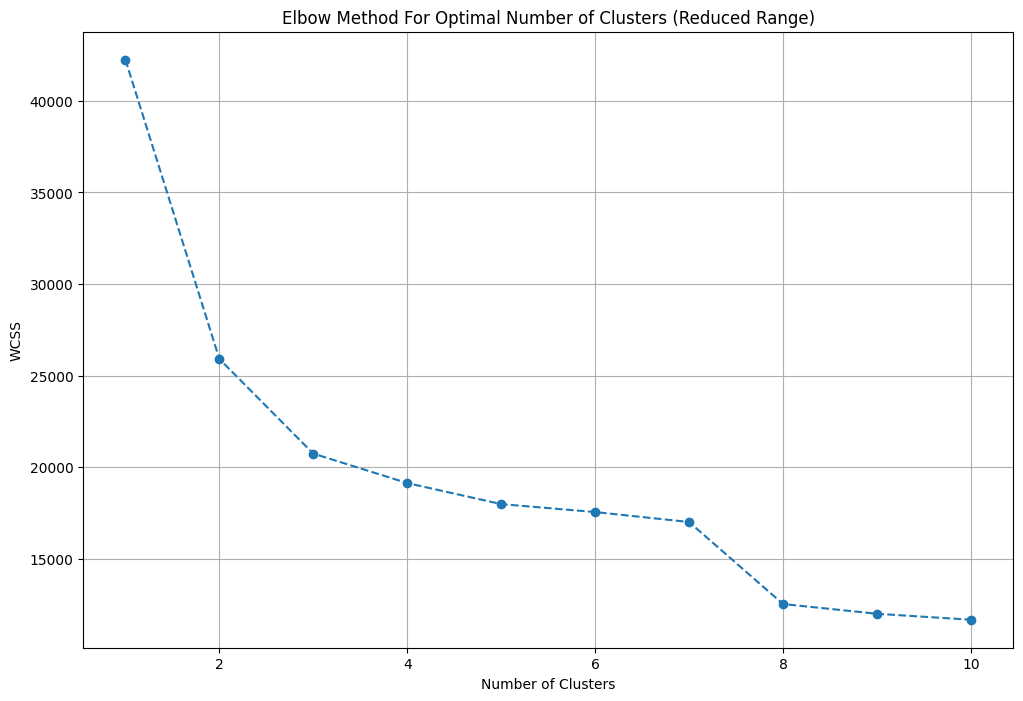

In [181]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [182]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [183]:
df = df.iloc[:,:-18]

In [184]:
df['furnishing_type'] = cluster_assignments

In [185]:
df.sample(5)[['furnishing_details','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishing_details,furnishing_type
1244,NaN,0
2010,NaN,0
1686,"2 Fan, 1 Sofa, 3 Light, 1 Modular Kitchen, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Geyser, No Microwave, No Fridge, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier, 2 Fan, 1 Sofa, 3 Light, 1 Modular Kitchen, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Geyser, No Microwave, No Fridge, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier",0
885,NaN,0
1945,NaN,0


In [186]:
#5.features
df[['society','features']].sample(5)

,society,features
904,runwal elegante,"Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Separate entry for servant room, No open drainage around, Piped-gas, Internet/wi-fi connectivity, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center"
1628,evershine amavi,"Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking"
1794,colaba building,"Feng Shui / Vaastu Compliant, Lift(s), Piped-gas, Swimming Pool, Park, Natural Light, Internet/wi-fi connectivity, Airy Rooms, Shopping Centre, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center, Water softening plant"
1261,ghatkopar east,"Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, No open drainage around, Piped-gas, Security Personnel, Natural Light, Airy Rooms, Low Density Society, Waste Disposal"
1326,prestige jasdan classic,"Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Piped-gas, Visitor Parking, Swimming Pool, Park, Internet/wi-fi connectivity, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant"


In [187]:
df['features'].isnull().sum()

np.int64(32)

In [188]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [189]:

# 1. Clean and convert features to list
def convert_to_list(x):
    if pd.isna(x):
        return []
    # Split by comma and strip extra spaces
    return [i.strip() for i in x.split(',')]

df['features_list'] = df['features'].apply(convert_to_list)

# -------------------------------
# 2. Convert list to binary columns
# -------------------------------
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Create DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)


In [190]:
features_binary_df.sample(5)

,Airy Rooms,Aji Ajoba Park,Bank Attached Property,Bhakti Park,Bhakti Park Monorail Station,Centrally Air Conditioned,Club house / Community Center,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fitness Centre / GYM,Golden Park Hospital,Golden Park Hospitals,High Ceiling Height,Hub Mall Parking,Indraprastha Shopping Centre,Infinity Mall Car Parking,Intercom Facility,Internet/wi-fi connectivity,Kamadhenu Shopping Centre,Lift(s),Low Density Society,Mahanagar Palika Public Parking,Maintenance Staff,Mega Mall Parking,Mittal Shopping Centre Complex,NESCO IT Park,Natural Light,No open drainage around,Park,Park Site Road,Piped-gas,Power Back-up,Private Garden / Terrace,Rain Water Harvesting,Recently Renovated,Regency Park,SP Jain Parking,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Shopping Centre,Shopping Centre\n33,Spacious Interiors,Swimming Pool,Vakratunda Corporate Park,Visitor Parking,WR Parking,Waste Disposal,Water Storage,Water purifier,Water softening plant,Yajhoo Park
454,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0
1706,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
176,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0
919,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0
1217,1,0,0,0,0,1,1,1,1,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0


In [191]:
features_binary_df.shape

(2347, 52)

In [192]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}


In [193]:
# STEP 1: Filter weights to keep only amenities that exist in your dataset
available_features = [f for f in weights.keys() if f in features_binary_df.columns]

print("Number of features in dataset:", len(features_binary_df.columns))
print("Number of weight features found:", len(available_features))

# STEP 2: Create a filtered weight dictionary
filtered_weights = {k: weights[k] for k in available_features}

# STEP 3: Calculate luxury score only using available features
luxury_score = features_binary_df[list(filtered_weights.keys())] \
                .multiply(list(filtered_weights.values())) \
                .sum(axis=1)

# STEP 4: Add as new column into df
df["luxury_score"] = luxury_score


Number of features in dataset: 52
Number of weight features found: 23


In [194]:
df.sample(1)

,society,price,price_per_sqft,area,bhk,area_with_Type,bedrooms,bathrooms,balcony,additional_rooms,floor,property_age,facing,nearby_location,features,furnishing_details,major_location,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
577,kanakia zen world,1.55,20612.0,752,2,Super Built up area 752\n(69.86 sq.m.)\nBuilt Up area: 650 sq.ft. (60.39 sq.m.)\nCarpet area: 537 sq.ft. (49.89 sq.m.) \nsq.ft.,2,2,0,"pooja room,others",21.0,Relatively New,North-West,"Kanjur Marg Railway Station, Vikhroli Railway Station, Huma Mall, Neptune Magnet Mall, R City Mall, Orchids The Intl School, Vikhroli","Lift(s), Water purifier, False Ceiling Lighting, No open drainage around, Piped-gas, Swimming Pool, Park, Natural Light, Airy Rooms, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center","4 Fan, 1 Exhaust Fan, 2 Geyser, 7 Light, 1 Modular Kitchen, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier, 4 Fan, 1 Exhaust Fan, 2 Geyser, 7 Light, 1 Modular Kitchen, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Microwave, No Fridge, No Sofa, No Stove, No TV, No Wardrobe, No Washing Machine, No Water Purifier",Kanjurmarg East,752.0,650.0,537.0,0,0,0,1,1,1,"[Lift(s), Water purifier, False Ceiling Lighting, No open drainage around, Piped-gas, Swimming Pool, Park, Natural Light, Airy Rooms, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",60


In [195]:
# cols to drop -> nearbyLocations,furnishing_details, features,features_list, additionalRoom
df.drop(columns=['nearby_location','furnishing_details','features','features_list','additional_rooms'],inplace=True)

In [196]:
df.sample(5)

,society,price,price_per_sqft,area,bhk,area_with_Type,bedrooms,bathrooms,balcony,floor,property_age,facing,major_location,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
604,rustomjee bella,1.07,25176.0,425,1,Carpet area: 425\n(39.48 sq.m.) \nsq.ft.,1,2,0,20.0,New Property,East,Bhandup West,NaN,NaN,425.0,0,0,0,0,1,0,64
2296,mayfair the view,0.85,21684.0,392,1,Built Up area: 392\n(36.42 sq.m.)\nCarpet area: 280 sq.ft. (26.01 sq.m.) \nsq.ft.,1,1,1,13.0,Relatively New,North-East,Vikhroli West,NaN,392.0,280.0,0,0,0,0,0,0,131
80,sheth vasant blossom,3.49,27920.0,1250,3,Super Built up area 1250\n(116.13 sq.m.)\nBuilt Up area: 1150 sq.ft. (106.84 sq.m.)\nCarpet area: 971 sq.ft. (90.21 sq.m.) \nsq.ft.,3,3,1,10.0,Relatively New,East,Andheri East,1250.0,1150.0,971.0,0,1,0,0,0,0,70
2241,new building,2.25,45000.0,500,1,Super Built up area 500\n(46.45 sq.m.)\nBuilt Up area: 480 sq.ft. (44.59 sq.m.)\nCarpet area: 450 sq.ft. (41.81 sq.m.) \nsq.ft.,1,1,1,12.0,Relatively New,East,Dadar West,500.0,480.0,450.0,0,0,1,0,0,0,65
2222,bhavya heights,5.50,44000.0,1250,3,Carpet area: 1250\n(116.13 sq.m.) \nsq.ft.,3,3,0,7.0,Relatively New,South-West,Parsi Colony,NaN,NaN,1250.0,0,0,1,0,0,1,46


In [197]:
df.shape

(2347, 23)

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

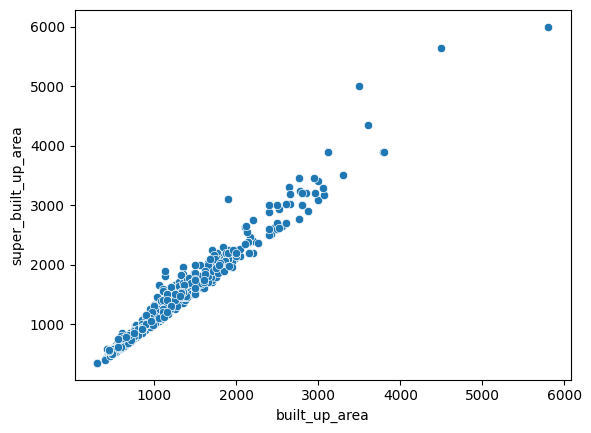

In [198]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

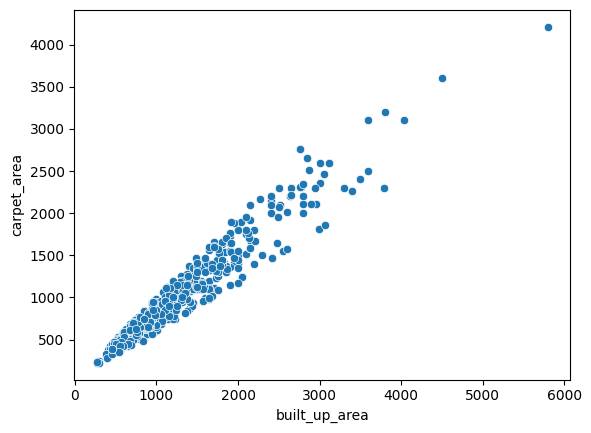

In [199]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [200]:
df_1= df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))]

In [201]:
df_1['built_up_area']=df_1['area']

C:\Users\vikas\AppData\Local\Temp\ipykernel_16276\3005875155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['built_up_area']=df_1['area']


In [202]:
df.update(df_1)

C:\Users\vikas\AppData\Local\Temp\ipykernel_16276\2766816723.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 1 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.update(df_1)


In [203]:
df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))]

,society,price,price_per_sqft,area,bhk,area_with_Type,bedrooms,bathrooms,balcony,floor,property_age,facing,major_location,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [204]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [205]:
all_present_df.shape


(575, 23)

In [206]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [207]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()


In [208]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)


1.1111111111111112 0.8333333333333334


In [209]:
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]


In [210]:
sbc_df.head()

,society,price,price_per_sqft,area,bhk,area_with_Type,bedrooms,bathrooms,balcony,floor,property_age,facing,major_location,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
49,kalpataru residency,7.25,42647.0,1700,3,Super Built up area 1700\n(157.94 sq.m.)\nCarpet area: 1260 sq.ft. (117.06 sq.m.) \nsq.ft.,3,4,0,10.0,Old Property,NaN,Sion,1700.0,NaN,1260.0,0,0,1,0,0,2,84
74,sheth vasant oasis,3.10,24741.0,1253,3,Super Built up area 1253\n(116.41 sq.m.)\nCarpet area: 905 sq.ft. (84.08 sq.m.) \nsq.ft.,3,3,0,1.0,Relatively New,East,Andheri East,1253.0,NaN,905.0,0,0,0,1,0,1,72
84,hdil metropolis residences,5.15,20674.0,2491,4,Super Built up area 2491\n(231.42 sq.m.)\nCarpet area: 1670 sq.ft. (155.15 sq.m.) \nsq.ft.,4,4,3+,7.0,Moderately Old,East,Andheri West,2491.0,NaN,1670.0,0,0,0,0,0,0,113
86,samartha deep,3.50,34180.0,1024,2,Super Built up area 1024\n(95.13 sq.m.)\nCarpet area: 800 sq.ft. (74.32 sq.m.) \nsq.ft.,2,2,1,20.0,Moderately Old,East,Andheri West,1024.0,NaN,800.0,0,0,0,0,0,0,34
87,gundecha symphony,2.50,26316.0,950,2,Super Built up area 950\n(88.26 sq.m.)\nCarpet area: 690 sq.ft. (64.1 sq.m.) \nsq.ft.,2,2,0,8.0,Old Property,East,Andheri West,950.0,NaN,690.0,0,1,0,0,0,0,53


In [211]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.111) + (sbc_df['carpet_area']/0.833))/2),inplace=True)

C:\Users\vikas\AppData\Local\Temp\ipykernel_16276\3156289819.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.111) + (sbc_df['carpet_area']/0.833))/2),inplace=True)
C:\Users\vikas\AppData\Local\Temp\ipykernel_16276\3156289819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [212]:
df.update(sbc_df)

In [213]:
df.isnull().sum()

society                   2
price                     1
price_per_sqft            1
area                      0
bhk                       0
area_with_Type            0
bedrooms                  0
bathrooms                 0
balcony                   0
floor                    12
property_age             17
facing                  202
major_location            0
super_built_up_area    1553
built_up_area          1360
carpet_area              89
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [214]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [215]:
sb_df.head()


,society,price,price_per_sqft,area,bhk,area_with_Type,bedrooms,bathrooms,balcony,floor,property_age,facing,major_location,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
311,rustomjee oriana,8.15,44879.0,1816,3,Super Built up area 1816\n(168.71 sq.m.) \nsq.ft.,3,4,1,7.0,Moderately Old,South,Gandhi Nagar,1816.0,NaN,NaN,0,0,0,0,0,0,44
471,charmee enclave,3.00,30000.0,1000,3,Super Built up area 1000\n(92.9 sq.m.) \nsq.ft.,3,2,0,8.0,Moderately Old,NaN,Vile Parle East,1000.0,NaN,NaN,0,0,0,0,0,0,0
575,joy solitaire juhu scheme,16.50,55000.0,3000,5,Super Built up area 3000\n(278.71 sq.m.) \nsq.ft.,5,7,3+,7.0,Moderately Old,NaN,Juhu Scheme,3000.0,NaN,NaN,0,1,0,0,0,2,0
772,gundecha marigold,1.80,22086.0,815,2,Super Built up area 815\n(75.72 sq.m.) \nsq.ft.,2,2,0,5.0,Moderately Old,East,Kandivali East,815.0,NaN,NaN,0,0,1,0,0,0,106
880,runwal elegante,6.35,36080.0,1760,3,Super Built up area 1760\n(163.51 sq.m.) \nsq.ft.,3,3,2,17.0,New Property,North,Andheri West,1760.0,NaN,NaN,0,0,0,0,1,1,88


In [216]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.111),inplace=True)


C:\Users\vikas\AppData\Local\Temp\ipykernel_16276\3407678737.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.111),inplace=True)
C:\Users\vikas\AppData\Local\Temp\ipykernel_16276\3407678737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(rou

In [217]:
df.update(sb_df)


In [218]:
df.isnull().sum()

society                   2
price                     1
price_per_sqft            1
area                      0
bhk                       0
area_with_Type            0
bedrooms                  0
bathrooms                 0
balcony                   0
floor                    12
property_age             17
facing                  202
major_location            0
super_built_up_area    1553
built_up_area          1332
carpet_area              89
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [219]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [220]:
c_df.head()

,society,price,price_per_sqft,area,bhk,area_with_Type,bedrooms,bathrooms,balcony,floor,property_age,facing,major_location,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
7,wadhwa promenade at the address,1.85,28462.0,650,2,Carpet area: 650\n(60.39 sq.m.) \nsq.ft.,2,2,0,20.0,Moderately Old,East,Ghatkopar West,NaN,NaN,650.00,0,0,0,0,0,0,72
13,kalpataru aura,2.80,36129.0,775,2,Carpet area: 775\n(72 sq.m.) \nsq.ft.,2,2,0,3.0,Moderately Old,West,Ghatkopar West,NaN,NaN,775.00,0,0,0,0,0,1,103
20,ashok odyssey,1.00,24390.0,410,1,Carpet area: 410\n(38.09 sq.m.) \nsq.ft.,1,2,0,6.0,New Property,East,Ghatkopar West,NaN,NaN,410.00,0,0,0,0,0,0,49
26,wadhwa promenade at the address,1.75,26965.0,649,2,Carpet area: 649\n(60.29 sq.m.) \nsq.ft.,2,2,0,12.0,Moderately Old,North-West,Ghatkopar West,NaN,NaN,649.00,0,0,0,0,0,1,86
28,ashok odyssey,2.00,24600.0,813,2,Carpet area: 813.56\n(75.58 sq.m.) \nsq.ft.,2,2,1,4.0,New Property,East,Ghatkopar West,NaN,NaN,813.56,0,0,0,0,0,0,68


In [221]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.833),inplace=True)

C:\Users\vikas\AppData\Local\Temp\ipykernel_16276\447734300.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.833),inplace=True)
C:\Users\vikas\AppData\Local\Temp\ipykernel_16276\447734300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carp

In [222]:
df.update(c_df)

In [223]:
df.isnull().sum()


society                   2
price                     1
price_per_sqft            1
area                      0
bhk                       0
area_with_Type            0
bedrooms                  0
bathrooms                 0
balcony                   0
floor                    12
property_age             17
facing                  202
major_location            0
super_built_up_area    1553
built_up_area             0
carpet_area              89
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

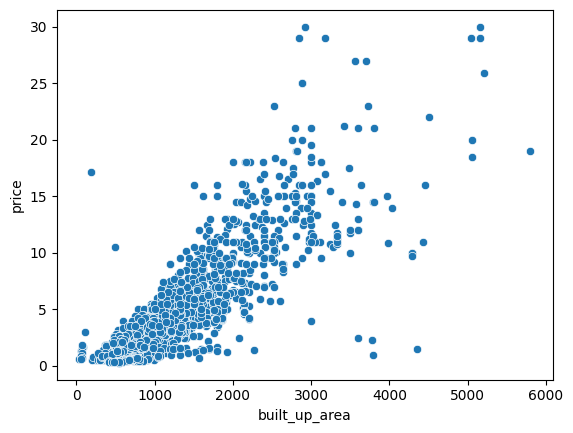

In [224]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [225]:
df_2 = df[(df['price'] > 15) & (df['built_up_area'] < 1200)]

In [226]:
df_2

,society,price,price_per_sqft,area,bhk,area_with_Type,bedrooms,bathrooms,balcony,floor,property_age,facing,major_location,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2209,suraj ocean star,17.13,99942.0,1714,4,Carpet area: 159.3 \nsq.m.,4,4,0,16.0,New Property,West,Dadar West,NaN,191.0,159.3,0,0,0,0,0,0,56


In [227]:
df_2['built_up_area'] = df_2['area']

C:\Users\vikas\AppData\Local\Temp\ipykernel_16276\645653986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['built_up_area'] = df_2['area']


In [228]:
df_2['carpet_area']=round(df_2['built_up_area']*0.833)

C:\Users\vikas\AppData\Local\Temp\ipykernel_16276\3035919921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['carpet_area']=round(df_2['built_up_area']*0.833)


In [229]:
df_2

,society,price,price_per_sqft,area,bhk,area_with_Type,bedrooms,bathrooms,balcony,floor,property_age,facing,major_location,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2209,suraj ocean star,17.13,99942.0,1714,4,Carpet area: 159.3 \nsq.m.,4,4,0,16.0,New Property,West,Dadar West,NaN,1714,1428.0,0,0,0,0,0,0,56


In [230]:
df.update(df_2)

<Axes: xlabel='built_up_area', ylabel='price'>

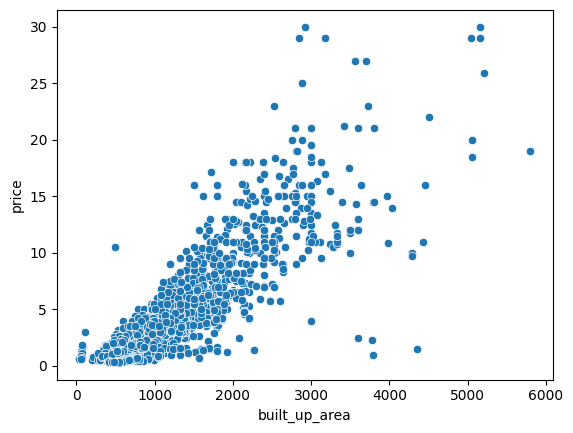

In [231]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [232]:
df[(df['price'] < 5) & (df['built_up_area'] > 3000)]

,society,price,price_per_sqft,area,bhk,area_with_Type,bedrooms,bathrooms,balcony,floor,property_age,facing,major_location,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
15,wadhwa vista,1.00,2643.0,3784,4,Wadhwa Vista Ghatkopar West,4,3,3,3.0,Moderately Old,East,Ghatkopar West,NaN,3784.0,NaN,0,1,0,0,0,1,151
909,lbs marg bhandup west,1.45,3994.0,3630,2,Carpet area: 3630\n(337.24 sq.m.) \nsq.ft.,2,2,0,17.0,New Property,East,Bhandup West,NaN,4358.0,3630.0,0,0,0,0,1,0,41
1599,gokul township,2.25,7143.0,3150,3,Carpet area: 3150\n(292.64 sq.m.) \nsq.ft.,3,4,3+,NaN,Relatively New,West,Virar West,NaN,3782.0,3150.0,0,0,0,0,1,1,49
1630,shivasthan,2.50,6250.0,4000,5,Plot area 4000\n(371.61 sq.m.)\nCarpet area: 3000 sq.ft. (278.71 sq.m.) \nsq.ft.,5,4,2,NaN,Old Property,West,Virar West,NaN,3601.0,3000.0,0,0,0,1,0,1,49


In [233]:
df.drop(columns=['area','area_with_Type','super_built_up_area','carpet_area'],inplace=True)

In [234]:
df.head()

,society,price,price_per_sqft,bhk,bedrooms,bathrooms,balcony,floor,property_age,facing,major_location,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,kalpataru aura,3.49,34249.0,2,2,2,1,20.0,New Property,South-East,Ghatkopar West,1019.0,0,1,0,0,0,0,69
1,prince tower,1.10,22917.0,1,1,1,0,1.0,Old Property,NaN,Ghatkopar West,480.0,0,0,0,0,0,0,0
2,sai darshan apartment,1.10,22000.0,1,1,1,0,7.0,Old Property,West,Ghatkopar West,500.0,0,0,0,0,0,1,7
3,kalpataru aura,3.49,33238.0,3,3,2,0,20.0,Relatively New,West,Ghatkopar West,1050.0,0,0,0,0,0,1,104
4,wadhwa promenade at the address,2.20,33283.0,2,2,2,0,15.0,Old Property,North,Ghatkopar West,661.0,0,0,0,0,0,0,94


In [235]:
df.isnull().sum()

society              2
price                1
price_per_sqft       1
bhk                  0
bedrooms             0
bathrooms            0
balcony              0
floor               12
property_age        17
facing             202
major_location       0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

### After feature selection i decided to add more data and remove less important columns

In [236]:
df2 = pd.read_csv(r'E:\Mumbai Flat Real Estate Intelligence\datasets\mumbai_flat_2.csv')

In [237]:
df2.columns

Index(['flat_type', 'flat_price', 'location1', 'buildupArea_sqft',
       'age_of_property', 'furnishing', 'bedrooms', 'bathrooms', 'balcony',
       'parking'],
      dtype='object')

In [238]:
df2.drop(columns=['parking','flat_type'],inplace=True)

In [239]:
df2.columns

Index(['flat_price', 'location1', 'buildupArea_sqft', 'age_of_property',
       'furnishing', 'bedrooms', 'bathrooms', 'balcony'],
      dtype='object')

In [240]:
df.columns

Index(['society', 'price', 'price_per_sqft', 'bhk', 'bedrooms', 'bathrooms',
       'balcony', 'floor', 'property_age', 'facing', 'major_location',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [241]:
df.drop(columns=['society','bhk','facing','luxury_score','study room','servant room','store room','pooja room','others','pooja room','price_per_sqft','floor'],inplace=True)

In [242]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'balcony', 'property_age',
       'major_location', 'built_up_area', 'furnishing_type'],
      dtype='object')

In [243]:
df2.rename(columns={
    'flat_price': 'price',
    'location1': 'major_location',
    'buildupArea_sqft':'built_up_area',
    'age_of_property':'property_age',
    'furnishing':'furnishing_type'
}, inplace=True)


In [244]:
df2.columns

Index(['price', 'major_location', 'built_up_area', 'property_age',
       'furnishing_type', 'bedrooms', 'bathrooms', 'balcony'],
      dtype='object')

In [245]:
df.shape

(2347, 8)

In [246]:
df['furnishing_type'].value_counts()

furnishing_type
0    1630
1     527
2     190
Name: count, dtype: int64

In [247]:
df['furnishing_type'] = df['furnishing_type'].replace({0.0:'Unfurnished',1.0:'Semi Furnished',2.0:'Fully Furnished'})

In [248]:
df2.shape

(7483, 8)

In [249]:
df2['balcony'].value_counts()

balcony
0    4468
1    1313
2     866
3     666
4     153
5      17
Name: count, dtype: int64

In [250]:
df2['balcony'] = df2['balcony'].apply(lambda x: '3+' if x >= 4 else str(x))

In [251]:
df2['furnishing_type'].value_counts()

furnishing_type
Semi Furnished     3962
Unfurnished        2629
Fully Furnished     892
Name: count, dtype: int64

In [252]:
merged_df = pd.merge(
    df,
    df2,
    on=['price', 'bedrooms', 'bathrooms', 'balcony',
        'property_age', 'major_location', 'built_up_area',
        'furnishing_type'],
    how='outer'
)


C:\Users\vikas\AppData\Local\Temp\ipykernel_16276\1986104486.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(


In [253]:
merged_df.shape

(9830, 8)

In [254]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9830 entries, 0 to 9829
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            9829 non-null   float64
 1   bedrooms         9830 non-null   int64  
 2   bathrooms        9830 non-null   int64  
 3   balcony          9830 non-null   object 
 4   property_age     9813 non-null   object 
 5   major_location   9830 non-null   object 
 6   built_up_area    9830 non-null   float64
 7   furnishing_type  9830 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 614.5+ KB


In [255]:
merged_df[merged_df.duplicated()]

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
14,0.22,1,2,1,recent construction,Naigaon East,500.00,Unfurnished
22,0.23,1,2,1,recent construction,Naigaon East,500.00,Unfurnished
48,0.25,1,1,2,recent construction,Naigaon East,500.00,Unfurnished
75,0.26,1,1,2,recent construction,Naigaon East,500.00,Unfurnished
76,0.26,1,1,2,recent construction,Naigaon East,500.00,Unfurnished
93,0.26,2,1,2,new construction,others,790.00,Semi Furnished
103,0.27,1,1,2,recent construction,Nalasopara West,545.00,Semi Furnished
124,0.28,1,1,1,recent construction,Virar West,750.00,Semi Furnished
129,0.28,1,1,2,recent construction,Nalasopara West,490.00,Semi Furnished
134,0.28,1,1,2,recent construction,Nalasopara West,585.00,Semi Furnished


In [256]:
merged_df.drop_duplicates(inplace=True)

In [257]:
merged_df[merged_df.duplicated()]

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type


In [258]:
merged_df.reset_index(drop=True, inplace=True)


In [259]:
merged_df['major_location'].value_counts().shape

(115,)

In [260]:
df['major_location'] = df['major_location'].replace('Other', 'others')

In [261]:
merged_df['major_location'].value_counts()

major_location
Mira Road East                  634
Chembur                         540
Andheri West                    523
Powai                           514
Kandivali East                  490
Virar West                      374
Mulund West                     304
Borivali West                   280
Goregaon East                   265
Malad West                      248
Bhandup West                    242
Borivali East                   234
Lower Parel                     227
Andheri East                    219
Dadar West                      208
Kandivali West                  205
Naigaon East                    197
Santacruz West                  170
others                          163
Nalasopara West                 158
Goregaon West                   156
Mulund East                     154
Wadala East                     152
Wadala                          132
Sion                            128
Kanjurmarg East                 116
Bandra West                     116
Dadar East   

In [262]:
merged_df['furnishing_type'].value_counts()

furnishing_type
Semi Furnished     4407
Unfurnished        4179
Fully Furnished    1081
Name: count, dtype: int64

In [263]:
merged_df['furnishing_type'] = merged_df['furnishing_type'].replace({
    'Semi Furnished': 'Furnished',
    'Fully Furnished': 'Furnished'
})


In [264]:
merged_df['furnishing_type'].value_counts()

furnishing_type
Furnished      5488
Unfurnished    4179
Name: count, dtype: int64

In [265]:
merged_df.to_csv('mumbai_properties_cleaned_v2.csv',index=False)